In [2]:
%%html
<marquee style='width: 30%; color: yellow;'><b>EDA & KNN</b></marquee>

Display the number M of cases = number of numerical rows;
each case is recorded by one row;
mpg = miles per gallon will be the target or response variable ;
the data table displays one column of M values for mpg and 5 columns of M values for the 5 explanatory variables or features
features will be denoted by F1= cyl, F2= dis, F3= hor, F4= wei, F5= acc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/knn/DataAuto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5


In [ ]:
#Display the number M of cases = number of numerical rows
M=len(df)
M

392

In [ ]:
df['mpg'].max()

46.6

In [ ]:
df['mpg'].min()

9.0

In [ ]:
mpg_outlier=np.mean(df['mpg'])+2*np.std(df['mpg'])
mpg_outlier

39.03600989271211

In [ ]:
mpg_outlier_l=np.mean(df['mpg'])-2*np.std(df['mpg'])
mpg_outlier_l

7.855826841981774

In [ ]:
df_outlier=df[df["mpg"]>mpg_outlier]
df_outlier

,mpg,cylinders,displacement,horsepower,weight,acceleration
242,43.1,4,90.0,48,1985,21.5
245,39.4,4,85.0,70,2070,18.6
307,41.5,4,98.0,76,2144,14.7
320,46.6,4,86.0,65,2110,17.9
322,40.8,4,85.0,65,2110,19.2
323,44.3,4,90.0,48,2085,21.7
324,43.4,4,90.0,48,2335,23.7
327,44.6,4,91.0,67,1850,13.8
339,39.1,4,79.0,58,1755,16.9
388,44.0,4,97.0,52,2130,24.6


In [ ]:
len(df_outlier)

10

## **Episode 1. Preliminary statistical data analysis** 
1) for each feature F compute/display its mean mF, standard deviation stdF, rangeF, 2) display the histogram histF of each feature F, and the histogram hist(mpg) of mpg
display the probability density function (PDF) of a normal density function with mean mF and standard deviation stdF
compare visually histF and this PDF
3) display the 5 scatterplots (cyl , mpg) , (dis , mpg) , (hor , mpg) , (wei , mpg) , (acc , mpg)
display the table of 5 correlations
cor(cyl , mpg) , cor(dis , mpg) , cor(hor , mpg), cor(wei , mpg), cor(acc , mpg)
interpret the 5 scatterplots and the table of 5 correlations to guess which features may have stronger capacity to predict msg
4) compute the 5x5 correlation matrix CORR(Fi,Fj) of the 5 features; interpretation of that matrix
5) Display the quantiles Q1% Q2% ... Q100% of the response variable mpg as an increasing quantile curve.
6) compute 5 linear regressions Y= A1*F1 +B1 +errorterm ..... Y= A5*F5 +B5 +errorterm give the values of A1,B1, RMSE1 ... A5,B5, RMSE5
this defines 5 linear predictors of Y denoted PRED1Y= A* F1 +B1 , ..... , PRED5Y= A5*F5 +B5 Compute the relative accuracies of these 5 predictors : RMSE1 / mean(Y) , ... , RMSE5 / mean(Y) display each linear graphs PREDjY versus Fj on same graph as corresponding scatterplot (Fj,Y) Interpretation of these results



### 1) For each feature F compute/display its mean mF, standard deviation stdF, rangeF


In [ ]:
#F1=cyl
mF1=df['cylinders'].mean()
stdF1=df['cylinders'].std()
rangeF1=max(df['cylinders'])-min(df['cylinders'])
print('mean value of cylineders is','%.3f'%mF1,'standard deviation of cylineders is','%.3f'%stdF1,'and the data range is''%.1f'%rangeF1)

mean value of cylineders is 5.472 standard deviation of cylineders is 1.706 and the data range is5.0


In [ ]:
#F2=displacement
mF2=df['displacement'].mean()
stdF2=df['displacement'].std()
rangeF2=max(df['displacement'])-min(df['displacement'])
print('mean value of displacement is','%.3f'%mF2,'standard deviation of displacement is','%.3f'%stdF2,'and the data range is ''%.1f'%rangeF2)

mean value of displacement is 194.412 standard deviation of displacement is 104.644 and the data range is 387.0


In [ ]:
#F3=horsepower
mF3=df['horsepower'].mean()
stdF3=df['horsepower'].std()
rangeF3=max(df['horsepower'])-min(df['horsepower'])
print('mean value of horsepower is','%.3f'%mF3,'standard deviation of horsepower is','%.3f'%stdF3,'and the data range is ''%.1f'%rangeF3)

mean value of horsepower is 104.469 standard deviation of horsepower is 38.491 and the data range is 184.0


In [ ]:
#F4=weight
mF4=df['weight'].mean()
stdF4=df['weight'].std()
rangeF4=max(df['weight'])-min(df['weight'])
print('mean value of weight is','%.3f'%mF4,'standard deviation of weight is','%.3f'%stdF4,'and the data range is ''%.1f'%rangeF4)

mean value of weight is 2977.584 standard deviation of weight is 849.403 and the data range is 3527.0


In [ ]:
#F5=acceleration
mF5=df['acceleration'].mean()
stdF5=df['acceleration'].std()
rangeF5=max(df['acceleration'])-min(df['acceleration'])
print('mean value of acceleration is','%.3f'%mF5,'standard deviation of acceleration is','%.3f'%stdF5,'and the data range is','%.1f'%rangeF5)

mean value of acceleration is 15.541 standard deviation of acceleration is 2.759 and the data range is 16.8


###2) Display the histogram histF of each feature F, and the histogram hist(mpg) of mpg; Display the probability density function (PDF) of a normal density function with mean mF and standard deviation stdF

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
import math

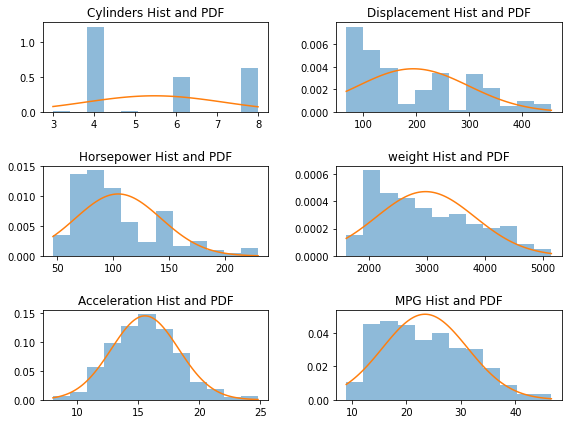

In [ ]:
from matplotlib.pyplot import figure
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5)) = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(8, 6)
#cylinders
mu0, std0 = norm.fit(df['cylinders']) 
x0 = np.linspace(df['cylinders'].min(),df['cylinders'].max(), 100)
ax0.hist(df['cylinders'],12,density=True,histtype='bar',alpha=0.5)
ax0.plot(x0, norm.pdf(x0, mu0,std0))
ax0.set_title('Cylinders Hist and PDF')
#displacement
mu1, std1 = norm.fit(df['displacement']) 
x1 = np.linspace(df['displacement'].min(),df['displacement'].max(), 100)
ax1.hist(df['displacement'],12,density=True,histtype='bar',alpha=0.5)
ax1.plot(x1, norm.pdf(x1, mu1,std1))
ax1.set_title('Displacement Hist and PDF')
#horsepower
mu2, std2 = norm.fit(df['horsepower']) 
x2 = np.linspace(df['horsepower'].min(),df['horsepower'].max(), 100)
ax2.hist(df['horsepower'],12,density=True,histtype='bar',alpha=0.5)
ax2.plot(x2, norm.pdf(x2, mu2,std2))
ax2.set_title('Horsepower Hist and PDF')
#weight
mu3, std3 = norm.fit(df['weight']) 
x3 = np.linspace(df['weight'].min(),df['weight'].max(), 100)
ax3.hist(df['weight'],12,density=True,histtype='bar',alpha=0.5)
ax3.plot(x3, norm.pdf(x3, mu3,std3))
ax3.set_title('weight Hist and PDF')
#acceleration
mu4, std4 = norm.fit(df['acceleration']) 
x4 = np.linspace(df['acceleration'].min(),df['acceleration'].max(), 100)
ax4.hist(df['acceleration'],12,density=True,histtype='bar',alpha=0.5)
ax4.plot(x4, norm.pdf(x4, mu4,std4))
ax4.set_title('Acceleration Hist and PDF')
#mpg
mu5, std5 = norm.fit(df['mpg']) 
x5 = np.linspace(df['mpg'].min(),df['mpg'].max(), 100)
ax5.hist(df['mpg'],12,density=True,histtype='bar',alpha=0.5)
ax5.plot(x5, norm.pdf(x5, mu5,std5))
ax5.set_title('MPG Hist and PDF')

fig.tight_layout()
plt.subplots_adjust(wspace=0.3 , hspace=0.6)
plt.show()

In [ ]:
df.iloc[:,1:6]

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130,3504,12.0
1,8,350.0,165,3693,11.5
2,8,318.0,150,3436,11.0
3,8,304.0,150,3433,12.0
4,8,302.0,140,3449,10.5
...,...,...,...,...,...
387,4,140.0,86,2790,15.6
388,4,97.0,52,2130,24.6
389,4,135.0,84,2295,11.6
390,4,120.0,79,2625,18.6


### 3) Display the 5 scatterplots (cyl , mpg) , (dis , mpg) , (hor , mpg) , (wei , mpg) , (acc , mpg)

Display the table of 5 correlations
cor(cyl , mpg) , cor(dis , mpg) , cor(hor , mpg), cor(wei , mpg), cor(acc , mpg)
interpret the 5 scatterplots and the table of 5 correlations to guess which features may have stronger capacity to predict msg


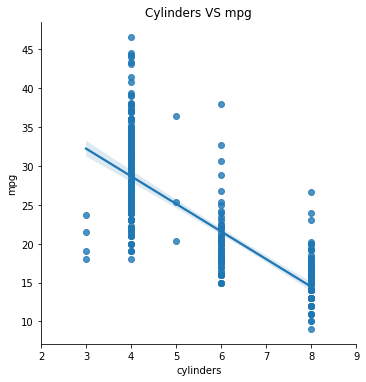

In [ ]:
#plt.scatter(df['cylinders'],df['mpg'])
g1=sns.lmplot(x='cylinders',y='mpg',data=df)
g1.set(xlim=(2,9))
plt.xlabel('cylinders')
plt.ylabel('mpg')
plt.title("Cylinders VS mpg")
plt.show()

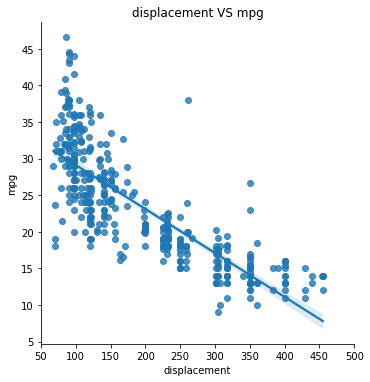

In [ ]:
#plt.scatter(df['displacement'],df['mpg'])
g2=sns.lmplot(x='displacement',y='mpg',data=df)
g2.set(xlim=(50,500))
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.title("displacement VS mpg")
plt.show()

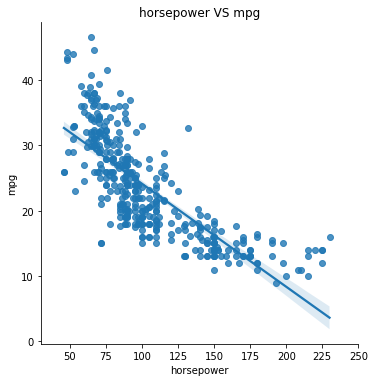

In [ ]:
#plt.scatter(df['horsepower'],df['mpg'])
g3=sns.lmplot(x='horsepower',y='mpg',data=df)
g3.set(xlim=(30,250))
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.title("horsepower VS mpg")
plt.show()

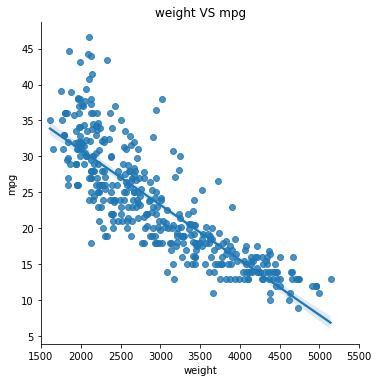

In [ ]:
g4=sns.lmplot(x='weight',y='mpg',data=df)
g4.set(xlim=(1500,5500))
plt.xlabel('weight')
plt.ylabel('mpg')
plt.title("weight VS mpg")
plt.show()

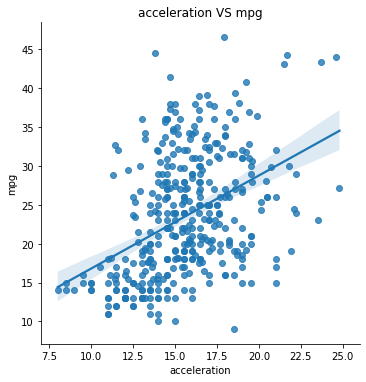

In [ ]:
g5=sns.lmplot(x='acceleration',y='mpg',data=df)
g5.set(xlim=(7,26))
plt.xlabel('acceleration')
plt.ylabel('mpg')
plt.title("acceleration VS mpg")
plt.show()

### 4) Compute the 5x5 correlation matrix CORR(Fi,Fj) of the 5 features; interpretation of that matrix

In [ ]:
correlations = df.iloc[:,1:6].corr()
print(correlations)

              cylinders  displacement  horsepower    weight  acceleration
cylinders      1.000000      0.950823    0.842983  0.897527     -0.504683
displacement   0.950823      1.000000    0.897257  0.932994     -0.543800
horsepower     0.842983      0.897257    1.000000  0.864538     -0.689196
weight         0.897527      0.932994    0.864538  1.000000     -0.416839
acceleration  -0.504683     -0.543800   -0.689196 -0.416839      1.000000


It indicates that there are strongly positive correlations between variables F1,F2,F3,F4, and there are weakly negative correlations between F5 and other four variables.


### 5) Display the quantiles Q1% Q2% ... Q100% of the response variable mpg as an increasing quantile curve

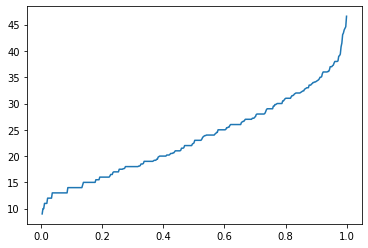

In [ ]:
m=df['mpg'].to_numpy()
m=np.sort(m)
mq=(1/392)* np.arange(1,393)
plt.plot(mq,m)

###6) Compute 5 linear regressions 
Compute 5 linear regressions Y= A1F1 +B1 +errorterm ..... Y= A5F5 +B5 +errorterm give the values of A1,B1, RMSE1 ... A5,B5, RMSE5 this defines 5 linear predictors of Y denoted PRED1Y= A* F1 +B1 , ..... , PRED5Y= A5*F5 +B5 Compute the relative accuracies of these 5 predictors : RMSE1 / mean(Y) , ... , RMSE5 / mean(Y) display each linear graphs PREDjY versus Fj on same graph as corresponding scatterplot (Fj,Y) Interpretation of these results

In [ ]:
f1 = df['cylinders']
f2 = df['displacement']
f3 = df['horsepower']
f4 = df['weight']
f5 = df['acceleration']

In [ ]:
### linear regression mpg and F1
regr1 = linear_model.LinearRegression()
regr1.fit(f1.to_numpy().reshape(-1, 1), df['mpg'].to_numpy().reshape(-1, 1))
pred1 = regr1.predict(f1.to_numpy().reshape(-1, 1))

print('Coefficients:', regr1.coef_)
print('intercept:', regr1.intercept_)
# The mean squared error and RMSE
print('Mean squared error:',
       mean_squared_error(df['mpg'],pred1))
print('RMSE:',
       math.sqrt(mean_squared_error(df['mpg'],pred1)))
print('Accuracy:',
       math.sqrt(mean_squared_error(df['mpg'],pred1,))/(df['mpg'].mean()))

Coefficients: [[-3.55807837]]
intercept: [42.91550535]
Mean squared error: 24.020179568155537
RMSE: 4.901038621369509
Accuracy: 0.2090358988963798


In [ ]:
### linear regression mpg and F2
regr2 = linear_model.LinearRegression()
regr2.fit(f2.to_numpy().reshape(-1, 1), df['mpg'].to_numpy().reshape(-1, 1))
pred2 = regr2.predict(f2.to_numpy().reshape(-1, 1))
pred2

print('Coefficients:', regr2.coef_)
print('intercept:', regr2.intercept_)
# The mean squared error and RMSE
print('Mean squared error:',
       mean_squared_error(pred2,df['mpg']))
print('RMSE:',
       math.sqrt(mean_squared_error(pred2,df['mpg'])))
print('Accuracy:',
       math.sqrt(mean_squared_error(pred2,df['mpg']))/(df['mpg'].mean()))

Coefficients: [[-0.06005143]]
intercept: [35.12063594]
Mean squared error: 21.37454494009465
RMSE: 4.623261288321768
Accuracy: 0.1971883214760557


In [ ]:
### linear regression mpg and F3
regr3 = linear_model.LinearRegression()
regr3.fit(f3.to_numpy().reshape(-1, 1), df['mpg'].to_numpy().reshape(-1, 1))
pred3 = regr3.predict(f3.to_numpy().reshape(-1, 1))
pred3

print('Coefficients:', regr3.coef_)
print('Intercept:', regr3.intercept_)
# The mean squared error and RMSE
print('Mean squared error:',
       mean_squared_error(pred3,df['mpg']))
print('RMSE:',
       math.sqrt(mean_squared_error(pred3,df['mpg'])))
print('Accuracy:',
       math.sqrt(mean_squared_error(pred3,df['mpg']))/(df['mpg'].mean()))

Coefficients: [[-0.15784473]]
Intercept: [39.93586102]
Mean squared error: 23.943662938603108
RMSE: 4.893226230065713
Accuracy: 0.20870268988398824


In [ ]:
### linear regression mpg and F4
regr4 = linear_model.LinearRegression()
regr4.fit(f4.to_numpy().reshape(-1, 1), df['mpg'].to_numpy().reshape(-1, 1))
pred4 = regr4.predict(f4.to_numpy().reshape(-1, 1))
pred4

print('Coefficients:', regr4.coef_)
print('Intercept:', regr4.intercept_)
# The mean squared error and RMSE
print('Mean squared error:',
       mean_squared_error(pred4,df['mpg']))
print('RMSE:',
       math.sqrt(mean_squared_error(pred4,df['mpg'])))
print('Accuracy:',
       math.sqrt(mean_squared_error(pred4,df['mpg']))/(df_outlier['mpg'].mean()))

Coefficients: [[-0.00764734]]
Intercept: [46.21652455]
Mean squared error: 18.6766165974193
RMSE: 4.321645126270701
Accuracy: 0.10125691486107546


In [ ]:
### linear regression mpg and F5
regr5 = linear_model.LinearRegression()
regr5.fit(f5.to_numpy().reshape(-1, 1), df['mpg'].to_numpy().reshape(-1, 1))
pred5 = regr5.predict(f5.to_numpy().reshape(-1, 1))
pred5

print('Coefficients:', regr5.coef_)
print('Intercept:', regr5.intercept_)
# The mean squared error and RMSE
print('Mean squared error:',
       mean_squared_error(pred5,f5))
print('RMSE:',
       math.sqrt(mean_squared_error(pred5,df['mpg'])))
print('Accuracy:',
       math.sqrt(mean_squared_error(pred5,df['mpg']))/(df['mpg'].mean()))

Coefficients: [[1.19762419]]
Intercept: [4.8332498]
Mean squared error: 62.779076754980416
RMSE: 7.062126261024527
Accuracy: 0.30120919771092985


# **Episode 2. Automatic Classification of Data by KNN Technique** 



### 8. Extract from the data set three disjoint tables of cases ,
LOWmpg table = {all cases for which mpg <= quantile Q33%}
MEDmpg table = {all cases for which quantile Q33% < mpg <= quantile Q66%}
HIGHmpg table = {all cases for which mpg > quantile Q66%}

In [ ]:
df_LOWmpg=df[df["mpg"]<=df['mpg'].quantile(0.33)]
df_LOWmpg 

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5
...,...,...,...,...,...,...
286,18.2,8,318.0,135,3830,15.2
287,16.9,8,350.0,155,4360,14.9
288,15.5,8,351.0,142,4054,14.3
290,18.5,8,360.0,150,3940,13.0


In [ ]:
df_HIGHmpg=df[df["mpg"]>df['mpg'].quantile(0.66)]
df_HIGHmpg


,mpg,cylinders,displacement,horsepower,weight,acceleration
18,27.0,4,97.0,88,2130,14.5
29,27.0,4,97.0,88,2130,14.5
30,28.0,4,140.0,90,2264,15.5
49,28.0,4,116.0,90,2123,14.0
50,30.0,4,79.0,70,2074,19.5
...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6
388,44.0,4,97.0,52,2130,24.6
389,32.0,4,135.0,84,2295,11.6
390,28.0,4,120.0,79,2625,18.6


In [ ]:
df_MEDmpg1 = df[df["mpg"]>df['mpg'].quantile(0.33)]
df_MEDmpg= df_MEDmpg1[df_MEDmpg1['mpg']<=df['mpg'].quantile(0.66)]
df_MEDmpg

,mpg,cylinders,displacement,horsepower,weight,acceleration
14,24.0,4,113.0,95,2372,15.0
15,22.0,6,198.0,95,2833,15.5
17,21.0,6,200.0,85,2587,16.0
19,26.0,4,97.0,46,1835,20.5
20,25.0,4,110.0,87,2672,17.5
...,...,...,...,...,...,...
360,20.2,6,200.0,88,3060,17.1
368,24.0,4,140.0,92,2865,16.4
380,25.0,6,181.0,110,2945,16.4
382,26.0,4,156.0,92,2585,14.5


LOWmpg, MEDmpg and HIGHmpg are generated, there are 130 cases in the Lowmpg dataset, 130 in MEDmpg and 132 in HIGHmpg.

### 9) For each feature F= F1 , ..., F5 , display side by side,
### the histogram hist.low(F) of F values for all cases in LOWmpg. 
### the histogram hist.high(F) of F values for all cases in HIGHmpg
### This will give you 5 pairs of histograms, one pair for each feature F
###interpret each such pair of histograms to guess which features may have a good capacity to discriminate between high mpg and low mpg

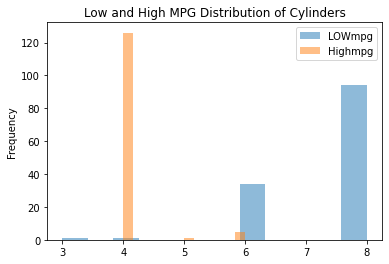

In [ ]:
histLOW_cylinders=df_LOWmpg['cylinders'].plot.hist(bins=12, alpha=0.5, label='LOWmpg')
histHIGH_cylinders=df_HIGHmpg['cylinders'].plot.hist(bins=12, alpha=0.5,label='Highmpg')
histLOW_cylinders.set_title('Low and High MPG Distribution of Cylinders')
plt.legend()
plt.show()

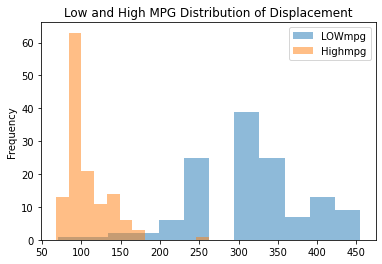

In [ ]:
histLOW_cylinders=df_LOWmpg['displacement'].plot.hist(bins=12, alpha=0.5, label='LOWmpg')
histHIGH_cylinders=df_HIGHmpg['displacement'].plot.hist(bins=12, alpha=0.5,label='Highmpg')
histLOW_cylinders.set_title('Low and High MPG Distribution of Displacement')
plt.legend()
plt.show()

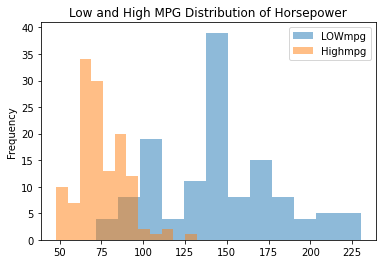

In [ ]:
histLOW_cylinders=df_LOWmpg['horsepower'].plot.hist(bins=12, alpha=0.5, label='LOWmpg')
histHIGH_cylinders=df_HIGHmpg['horsepower'].plot.hist(bins=12, alpha=0.5,label='Highmpg')
histLOW_cylinders.set_title('Low and High MPG Distribution of Horsepower')
plt.legend()
plt.show()

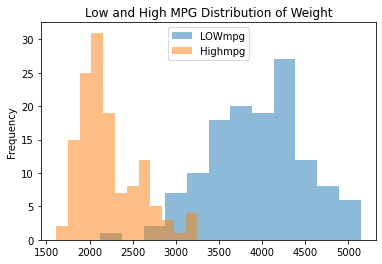

In [ ]:
histLOW_cylinders=df_LOWmpg['weight'].plot.hist(bins=12, alpha=0.5, label='LOWmpg')
histHIGH_cylinders=df_HIGHmpg['weight'].plot.hist(bins=12, alpha=0.5,label='Highmpg')
histLOW_cylinders.set_title('Low and High MPG Distribution of Weight')
plt.legend()
plt.show()

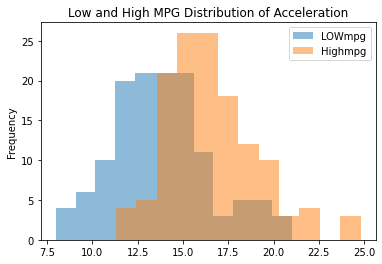

In [ ]:
histLOW_cylinders=df_LOWmpg['acceleration'].plot.hist(bins=12, alpha=0.5, label='LOWmpg')
histHIGH_cylinders=df_HIGHmpg['acceleration'].plot.hist(bins=12, alpha=0.5,label='Highmpg')
histLOW_cylinders.set_title('Low and High MPG Distribution of Acceleration')
plt.legend()
plt.show()

Answer: By the 5 side by side histogram shown above, features of  "Displacement","Horsepower" and "Weight" have a good capacity to discriminate between high mpg and low mpg.

### 10) For each feature F, compute the mean mL and standard dev. stdL of F values for all cases with LOWmpg; compute the mean mH and standard dev. stdH of F values for all cases with HIGHmpg compute 90% confidence intervals around mL and mH and compare them to evaluate the "power" of feature F to discriminate between low mpg and high mpg;compare these qualitative discriminating powers between the five feature

****10.1 For Responsible Feature MPG****

---


The mean low MPG is 15.145, std is 2.203, 90% CI is [14.828, 15.463];

---


The mean high MPG is 32.506, std is 4.392, 90% CI is [31.877 to 33.135];

---


the code is shown as following:

In [ ]:
mean_LOW=df_LOWmpg['mpg'].mean()
std_LOW=df_LOWmpg['mpg'].std()
n_LOW=len(df_LOWmpg)
h_MPG_LOW= 1.645*std_LOW/np.sqrt(n_LOW)
CIL_MPG_l=mean_LOW-h_MPG_LOW
CIL_MPG_h=mean_LOW+h_MPG_LOW
print("mean value of low mpg cases is",'%.3f'%mean_LOW, "std of low mpg cases is",'%.3f'%std_LOW, '\n' "90% Confidence intervals of low mpg mean is",'%.3f'%CIL_MPG_l,"to",'%.3f'%CIL_MPG_h)


mean value of low mpg cases is 15.145 std of low mpg cases is 2.203 
90% Confidence intervals of low mpg mean is 14.828 to 15.463


In [ ]:
mean_HIGH=df_HIGHmpg['mpg'].mean()
std_HIGH=df_HIGHmpg['mpg'].std()
n_HIGH=len(df_HIGHmpg)
h_MPG_HIGH= 1.645*std_HIGH/np.sqrt(n_HIGH)
CIH_MPG_l=mean_HIGH-h_MPG_HIGH
CIH_MPG_h=mean_HIGH+h_MPG_HIGH
print("mean value of high mpg cases is",'%.3f'%mean_HIGH, "std of high mpg cases is",'%.3f'%std_HIGH,'\n' "90% Confidence intervals of high mpg mean is",'%.3f'%CIH_MPG_l,"to",'%.3f'%CIH_MPG_h)


mean value of high mpg cases is 32.506 std of high mpg cases is 4.392 
90% Confidence intervals of high mpg mean is 31.877 to 33.135


****10.2 For Feature of Cylinders****

---


The mean cylinders at low MPG is 7.408  , std is 1.009, 90% CI is [7.090, 7.725];

---


The mean cylinders at high MPG is 4.083, std is 0.392 , 90% CI is [4.027 to 4.139];

---


the code is shown as following:

In [ ]:
F1_mean_LOW=df_LOWmpg['cylinders'].mean()
F1_std_LOW=df_LOWmpg['cylinders'].std()
n_LOW=len(df_LOWmpg)
h_F1_LOW= 1.645*F1_std_LOW/np.sqrt(n_LOW)
CIL_F1_l=F1_mean_LOW-h_F1_LOW
CIL_F1_h=F1_mean_LOW+h_F1_LOW
print("mean value of cylinders at low mpg cases is",'%.3f'%F1_mean_LOW,'\n'  "std of clylinders at low mpg cases is",'%.3f'%F1_std_LOW,'\n' "90% Confidence intervals of mean cylinders at low mpg is",'%.3f'%CIL_F1_l,"to",'%.3f'%CIL_F1_h)

mean value of cylinders at low mpg cases is 7.408 
std of clylinders at low mpg cases is 1.009 
90% Confidence intervals of mean cylinders at low mpg is 7.262 to 7.553


In [ ]:
F1_mean_HIGH=df_HIGHmpg['cylinders'].mean()
F1_std_HIGH=df_HIGHmpg['cylinders'].std()
n_HIGH=len(df_HIGHmpg)
h_F1_HIGH= 1.645*F1_std_HIGH/np.sqrt(n_HIGH)
CIH_F1_l=F1_mean_HIGH-h_F1_HIGH
CIH_F1_h=F1_mean_HIGH+h_F1_HIGH
print("mean value of cylinders at high mpg cases is",'%.3f'%F1_mean_HIGH, "std of clylinders at high mpg cases is",'%.3f'%F1_std_HIGH, "90% Confidence intervals of mean cylinders at high mpg is",'%.3f'%CIH_F1_l,"to",'%.3f'%CIH_F1_h)

mean value of cylinders at high mpg cases is 4.083 std of clylinders at high mpg cases is 0.392 90% Confidence intervals of mean cylinders at high mpg is 4.027 to 4.139


****10.3 For Feature F2=displacement****

---


The mean displacement at low MPG is 315.308   , std is 71.114, 90% CI is [305.048, 325.568];

---


The mean displacement at high MPG is 106.402, std is 26.422 , 90% CI is [140.452 to 150.794];

---


the code is shown as following:

In [ ]:
F2_mean_LOW=df_LOWmpg['displacement'].mean()
F2_std_LOW=df_LOWmpg['displacement'].std()
n_LOW=len(df_LOWmpg)
h_F2_LOW= 1.645*F2_std_LOW/np.sqrt(n_LOW)
CIL_F2_l=F2_mean_LOW-h_F2_LOW
CIL_F2_h=F2_mean_LOW+h_F2_LOW
print("mean value of displacement at low mpg cases is",'%.3f'%F2_mean_LOW, "STD of displacement at low mpg cases is",'%.3f'%F2_std_LOW, 
      "90% Confidence intervals of mean displacement at low mpg is",'%.3f'%CIL_F2_l,"to",'%.3f'%CIL_F2_h)

mean value of displacement at low mpg cases is 315.308 STD of displacement at low mpg cases is 71.114 90% Confidence intervals of mean displacement at low mpg is 305.048 to 325.568


In [ ]:

F2_mean_HIGH=df_HIGHmpg['displacement'].mean()
F2_std_HIGH=df_HIGHmpg['displacement'].std()
n_HIGH=len(df_HIGHmpg)
h_F2_HIGH= 1.645*F2_std_HIGH/np.sqrt(n_HIGH)
CIH_F2_l=F2_mean_HIGH-h_F2_HIGH
CIH_F2_h=F2_mean_HIGH+h_F2_HIGH
print("mean value of displacement at high mpg cases is",'%.3f'%F2_mean_HIGH, "STD of displacement at high mpg cases is",'%.3f'%F2_std_HIGH,
      "90% Confidence intervals of mean displacement at high mpg is",'%.3f'%CIH_F2_l,"to",'%.3f'%CIH_F2_h)

mean value of displacement at high mpg cases is 106.402 STD of displacement at high mpg cases is 26.422 90% Confidence intervals of mean displacement at high mpg is 102.618 to 110.185


****10.4 For Feature F3=horsepower****

---


The mean horsepower at low MPG is 145.623   , std is 35.841, 90% CI is [140.452, 150.794];

---


The mean horsepower at high MPG is 74.394, std is 13.884 , 90% CI is [72.406 to 76.382];

---


the code is shown as following:

In [ ]:
F3_mean_LOW=df_LOWmpg['horsepower'].mean()
F3_std_LOW=df_LOWmpg['horsepower'].std()
n_LOW=len(df_LOWmpg)
h_F3_LOW= 1.645*F3_std_LOW/np.sqrt(n_LOW)
CIL_F3_l=F3_mean_LOW-h_F3_LOW
CIL_F3_h=F3_mean_LOW+h_F3_LOW
print("mean value of horsepower at low mpg cases is",'%.3f'%F3_mean_LOW, "STD of horsepower at low mpg cases is",'%.3f'%F3_std_LOW, 
      "90% Confidence intervals of mean horsepower at low mpg is",'%.3f'%CIL_F3_l,"to",'%.3f'%CIL_F3_h)

mean value of horsepower at low mpg cases is 145.623 STD of horsepower at low mpg cases is 35.841 90% Confidence intervals of mean horsepower at low mpg is 140.452 to 150.794


In [ ]:
F3_mean_HIGH=df_HIGHmpg['horsepower'].mean()
F3_std_HIGH=df_HIGHmpg['horsepower'].std()
n_HIGH=len(df_HIGHmpg)
h_F3_HIGH= 1.645*F3_std_HIGH/np.sqrt(n_HIGH)
CIH_F3_l=F3_mean_HIGH-h_F3_HIGH
CIH_F3_h=F3_mean_HIGH+h_F3_HIGH
print("mean value of horsepower at high mpg cases is",'%.3f'%F3_mean_HIGH, "STD of horsepower at high mpg cases is",'%.3f'%F3_std_HIGH, 
      "90% Confidence intervals of mean horsepower at high mpg is",'%.3f'%CIH_F3_l,"to",'%.3f'%CIH_F3_h)

mean value of horsepower at high mpg cases is 74.394 STD of horsepower at high mpg cases is 13.884 90% Confidence intervals of mean horsepower at high mpg is 72.406 to 76.382


****10.5 For Feature F4=weight****

---


The mean weight at low MPG is 3937.331   , std is 557.186, 90% CI is [3856.942,4017.719];

---


The mean weight at high MPG is 2226.091 , std is 345.878 , 90% CI is [2176.569  to 2275.613];

---


the code is shown as following:

In [ ]:
F4_mean_LOW=df_LOWmpg['weight'].mean()
F4_std_LOW=df_LOWmpg['weight'].std()
n_LOW=len(df_LOWmpg)
h_F4_LOW= 1.645*F4_std_LOW/np.sqrt(n_LOW)
CIL_F4_l=F4_mean_LOW-h_F4_LOW
CIL_F4_h=F4_mean_LOW+h_F4_LOW
print("mean value of weight at low mpg cases is",'%.3f'%F4_mean_LOW, "STD of weight at low mpg cases is",'%.3f'%F4_std_LOW, 
      "90% Confidence intervals of mean weight at low mpg is",'%.3f'%CIL_F4_l,"to",'%.3f'%CIL_F4_h)

mean value of weight at low mpg cases is 3937.331 STD of weight at low mpg cases is 557.186 90% Confidence intervals of mean weight at low mpg is 3856.942 to 4017.719


In [ ]:
F4_mean_HIGH=df_HIGHmpg['weight'].mean()
F4_std_HIGH=df_HIGHmpg['weight'].std()
n_HIGH=len(df_HIGHmpg)
h_F4_HIGH= 1.645*F4_std_HIGH/np.sqrt(n_HIGH)
CIH_F4_l=F4_mean_HIGH-h_F4_HIGH
CIH_F4_h=F4_mean_HIGH+h_F4_HIGH
print("mean value of weight at high mpg cases is",'%.3f'%F4_mean_HIGH, "STD of weight at high mpg cases is",'%.3f'%F4_std_HIGH, 
      "90% Confidence intervals of mean weight at high mpg is",'%.3f'%CIH_F4_l,"to",'%.3f'%CIH_F4_h)

mean value of weight at high mpg cases is 2226.091 STD of weight at high mpg cases is 345.878 90% Confidence intervals of mean weight at high mpg is 2176.569 to 2275.613


****10.6 For Feature F5=acceleration****

---


The mean acceleration at low MPG is 13.778  , std is 2.649  , 90% CI is [13.396,14.161];

---


The mean acceleration at high MPG is 16.5611 , std is 2.520 , 90% CI is [16.200,16.921];

---


the code is shown as following:

In [ ]:
F5_mean_LOW=df_LOWmpg['acceleration'].mean()
F5_std_LOW=df_LOWmpg['acceleration'].std()
n_LOW=len(df_LOWmpg)
h_F5_LOW= 1.645*F5_std_LOW/np.sqrt(n_LOW)
CIL_F5_l=F5_mean_LOW-h_F5_LOW
CIL_F5_h=F5_mean_LOW+h_F5_LOW
print("mean value of acceleration at low mpg cases is",'%.3f'%F5_mean_LOW, "STD of acceleration at low mpg cases is",'%.3f'%F5_std_LOW, 
      "90% Confidence intervals of mean acceleration at low mpg is",'%.3f'%CIL_F5_l,"to",'%.3f'%CIL_F5_h)

mean value of acceleration at low mpg cases is 13.778 STD of acceleration at low mpg cases is 2.649 90% Confidence intervals of mean acceleration at low mpg is 13.396 to 14.161


In [ ]:
F5_mean_HIGH=df_HIGHmpg['acceleration'].mean()
F5_std_HIGH=df_HIGHmpg['acceleration'].std()
n_HIGH=len(df_HIGHmpg)
h_F5_HIGH= 1.645*F5_std_HIGH/np.sqrt(n_HIGH)
CIH_F5_l=F5_mean_HIGH-h_F5_HIGH
CIH_F5_h=F5_mean_HIGH+h_F5_HIGH
print("mean value of acceleration at high mpg cases is",'%.3f'%F5_mean_HIGH, "STD of acceleration at high mpg cases is",'%.3f'%F5_std_HIGH, 
      "90% Confidence intervals of mean acceleration at high mpg is",'%.3f'%CIH_F5_l,"to",'%.3f'%CIH_F5_h)

mean value of acceleration at high mpg cases is 16.561 STD of acceleration at high mpg cases is 2.520 90% Confidence intervals of mean acceleration at high mpg is 16.200 to 16.921


### **11) Application of the Automatic Classifier KNN**
Randomly partition 80%/20% each one of the 3 classes CL1= LOWmpg, CL2 =MEDmpg, CL3 =HIGHmpg
regroup these three partitions to construct then a global trainingset TRAIN and a global test set TEST of
sizes 80% xM and 20%xM
fix k= 5
apply the kNN algorithm to this data set

compute the two accuracies AccTrain and AccTest of automatic classification by kNN on the two sets
TRAIN and TEST
compare these two accuracies

****11.1 Data Sorting****

In [ ]:
#labeling the three class of data set, and saying CL1 which is low mpg is 0, CL2 is 1 and CL3 is 2
df_LOWmpg['class']=0
df_MEDmpg['class']=1
df_HIGHmpg['class']=2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
len(df_HIGHmpg)

132

In [ ]:
df_LOWmpg.head(),df_MEDmpg.head(),df_HIGHmpg.head()

(    mpg  cylinders  displacement  horsepower  weight  acceleration  class
 0  18.0          8         307.0         130    3504          12.0      0
 1  15.0          8         350.0         165    3693          11.5      0
 2  18.0          8         318.0         150    3436          11.0      0
 3  16.0          8         304.0         150    3433          12.0      0
 4  17.0          8         302.0         140    3449          10.5      0,
      mpg  cylinders  displacement  horsepower  weight  acceleration  class
 14  24.0          4         113.0          95    2372          15.0      1
 15  22.0          6         198.0          95    2833          15.5      1
 17  21.0          6         200.0          85    2587          16.0      1
 19  26.0          4          97.0          46    1835          20.5      1
 20  25.0          4         110.0          87    2672          17.5      1,
      mpg  cylinders  displacement  horsepower  weight  acceleration  class
 18  27.0       

In [ ]:
#separate x and y for each class;
#x is the 5 features and y is the classification label
x1=df_LOWmpg.iloc[:,1:6]
y1=df_LOWmpg.iloc[:,6]
x2=df_MEDmpg.iloc[:,1:6]
y2=df_MEDmpg.iloc[:,6]
x3=df_HIGHmpg.iloc[:,1:6]
y3=df_HIGHmpg.iloc[:,6]
print(x1.shape,y1.shape,x2.shape,y2.shape,x3.shape,y3.shape)

(130, 5) (130,) (130, 5) (130,) (132, 5) (132,)


In [ ]:
x1.head()

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130,3504,12.0
1,8,350.0,165,3693,11.5
2,8,318.0,150,3436,11.0
3,8,304.0,150,3433,12.0
4,8,302.0,140,3449,10.5


In [ ]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [ ]:
#randomly partition 80%/20% each one of the 3 classes;
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=11)
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=11)
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.2,random_state=11)

In [ ]:
print(x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape)

(104, 5) (26, 5) (104,) (26,)


In [ ]:
print(x2_train.shape,x2_test.shape,y2_train.shape,y2_test.shape)

(104, 5) (26, 5) (104,) (26,)


In [ ]:
print(x3_train.shape,x3_test.shape,y3_train.shape,y3_test.shape)

(105, 5) (27, 5) (105,) (27,)


In [ ]:
#combine train and test data set of all three classes together
x_train=pd.concat([x1_train,x2_train,x3_train],axis=0).to_numpy()
x_test=pd.concat([x1_test,x2_test,x3_test],axis=0).to_numpy()

y_train=pd.concat([y1_train,y2_train,y3_train],axis=0).to_numpy()
y_test=pd.concat([y1_test,y2_test,y3_test],axis=0).to_numpy()

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(313, 5) (79, 5) (313,) (79,)


In [ ]:
y_test.shape

(79,)

In [ ]:
import tensorflow as tf
depth=3
y_train_Truelabel=tf.one_hot(y_train,depth)
y_test_Truelabel=tf.one_hot(y_test,depth)
print(y_train_Truelabel.shape,y_test_Truelabel.shape)

(313, 3) (79, 3)


****11.2 Fit the KNN model****

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train_Truelabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#predit y_train and y_test and argmax to label
y_train_predlabel= model.predict(x_train) 
y_test_predlabel=model.predict(x_test)

y_train_pred = np.argmax(y_train_predlabel,axis=1)  
y_test_pred = np.argmax(y_test_predlabel,axis=1)

In [ ]:
from sklearn import metrics
## Model Accuracy
print("Accuracy of training set:",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy of test set:",metrics.accuracy_score(y_test, y_test_pred))

Accuracy of training set: 0.7763578274760383
Accuracy of test set: 0.7848101265822784


Text(0.5, 1.0, 'KNN(n=5) Confusion Matrix of Train Data')

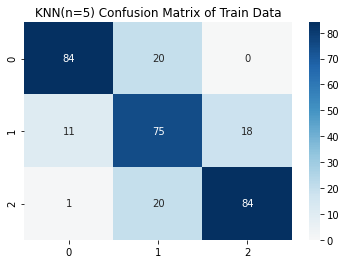

In [ ]:
sns.heatmap(tf.math.confusion_matrix(y_train,y_train_pred),annot = True, center= 0, cmap= 'RdBu').set_title('KNN(n=5) Confusion Matrix of Train Data')

Text(0.5, 1.0, 'KNN(n=5) Confusion Matrix of Test Data')

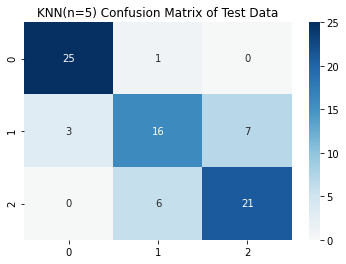

In [ ]:
sns.heatmap(tf.math.confusion_matrix(y_test,y_test_pred),annot = True, center= 0, cmap= 'RdBu').set_title('KNN(n=5) Confusion Matrix of Test Data')

From KNN classification above, in train data set, 77.6% classification is correct.
In test data set, there are 25+16+21=62 cases are classified right, therefore the accuracy rate is 62/79(total case)=78.48%

Please note that there are big scale difference between the 5 feature values, the classification above wasn't done by nomalized data. In following coding, the same KNN will be repeated, but the normalized data will be used to testify if data normalization will improve the classification accuracy. 
the maximum value of the 5 features are showing below.

****11.3 Normalize Data and Then Redo KNN Classifier****

In [ ]:
normaliz_coef=[max(df.iloc[:,1]),max(df.iloc[:,2]),max(df.iloc[:,3]),max(df.iloc[:,4]),max(df.iloc[:,5])]
normaliz_coef

[8, 455.0, 230, 5140, 24.8]

In [ ]:
x_train_norm=x_train/normaliz_coef
x_test_norm=x_test/normaliz_coef

In [ ]:
len(x_train_norm),len(y_train_Truelabel)

(313, 313)

In [ ]:
#Generate KNN model by normalized dataset
from sklearn.neighbors import KNeighborsClassifier
NORM_modelN5 = KNeighborsClassifier(n_neighbors=5)
NORM_modelN5.fit(x_train_norm,y_train_Truelabel)
#predit y_train and y_test and argmax to label
NORM_y_train_predlabel= NORM_modelN5.predict(x_train_norm) 
NORM_y_test_predlabel=NORM_modelN5.predict(x_test_norm)

NORM_y_train_pred = np.argmax(NORM_y_train_predlabel,axis=1)  
NORM_y_test_pred = np.argmax(NORM_y_test_predlabel,axis=1)

#Model Accuracy
from sklearn import metrics
ACCTrain5=metrics.accuracy_score(y_train, NORM_y_train_pred)
AccTest5=metrics.accuracy_score(y_test, NORM_y_test_pred)
print("Accuracy of training set:",ACCTrain5)
print("Accuracy of test set:",AccTest5)

Accuracy of training set: 0.8242811501597445
Accuracy of test set: 0.810126582278481


Now, the KNN by normalized data accuracy has been improved from 77% and 78% to 82% and 81%. From the confusion matrix below, 

---


in train data set, 92 of 104 for CL1, 78 of 104 for CL2 and 88 of 105. Indeed, there are 30 type I errors and 25 type II errors.

---


In Test data set, 21 of 26 for CL1, 20 of 26 for CL2 and 23 of 27 for CL3 were right. Indeed, there are 9 type I errors and 6 type II errors.

Text(0.5, 1.0, 'KNN(n=5) Confusion Matrix of Train_Norm')

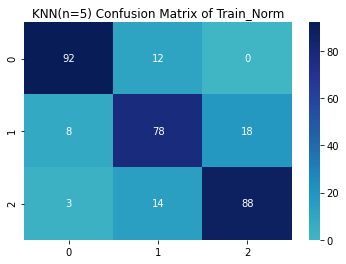

In [ ]:
sns.heatmap(tf.math.confusion_matrix(y_train,NORM_y_train_pred),annot = True, center= 0, cmap= 'YlGnBu').set_title('KNN(n=5) Confusion Matrix of Train_Norm')

Text(0.5, 1.0, 'KNN(n=5) Confusion Matrix of Test_Norm')

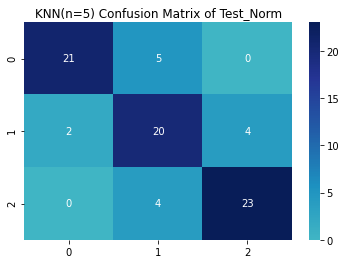

In [ ]:
sns.heatmap(tf.math.confusion_matrix(y_test,NORM_y_test_pred),annot = True, center= 0, cmap= 'YlGnBu').set_title('KNN(n=5) Confusion Matrix of Test_Norm')

### ***12. Repeat the preceding KNN for k=3,5,7,9,11,13,15,17,19,29,39 plot on same graph the two accuracy cures AccTrain and AccTest versus k to get the best value of k.***

In [ ]:
k=[3,5,7,9,11,13,15,17,19,29,39]
ACCTrain=[ACCTrain3,ACCTrain5,ACCTrain7,ACCTrain9,ACCTrain11,
          ACCTrain13,ACCTrain15,ACCTrain17,ACCTrain19,ACCTrain29,ACCTrain39]
AccTest=[AccTest3,AccTest5,AccTest7,AccTest9,AccTest11,AccTest13,AccTest15,AccTest17,AccTest19,AccTest29,AccTest39]

NameError: ignored

In [ ]:
np.std(AccTest)

0.03513081132905351

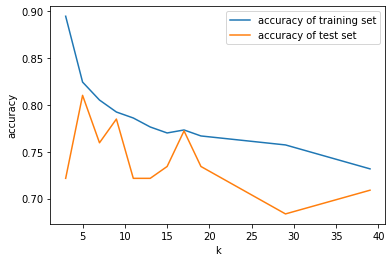

In [ ]:
#Run this plotting code after all rest of code been run
plt.plot(k,ACCTrain,label="accuracy of training set")
plt.plot(k,AccTest,label="accuracy of test set")
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend()
plt.show()

When k=3 AccTrain has the highest value 0.89, however, when k=5 AccTest has the best accuracy which is 0.81. From the plot the best value is k=5

In [ ]:
#Generate KNN model by normalized dataset
from sklearn.neighbors import KNeighborsClassifier
NORM_modelN3 = KNeighborsClassifier(n_neighbors=3)
NORM_modelN3.fit(x_train_norm,y_train_Truelabel)
#predit y_train and y_test and argmax to label
NORM_y_train3_predlabel= NORM_modelN3.predict(x_train_norm) 
NORM_y_test3_predlabel=NORM_modelN3.predict(x_test_norm)

NORM_y_train3_pred = np.argmax(NORM_y_train3_predlabel,axis=1)  
NORM_y_test3_pred = np.argmax(NORM_y_test3_predlabel,axis=1)

#Model Accuracy
from sklearn import metrics
ACCTrain3=metrics.accuracy_score(y_train, NORM_y_train3_pred)
AccTest3=metrics.accuracy_score(y_test, NORM_y_test3_pred)
print("Accuracy of training set:",ACCTrain3)
print("Accuracy of test set:",AccTest3)

Accuracy of training set: 0.8945686900958466
Accuracy of test set: 0.7215189873417721


In [ ]:
#Generate KNN model by normalized dataset
from sklearn.neighbors import KNeighborsClassifier
NORM_modelN7 = KNeighborsClassifier(n_neighbors=7)
NORM_modelN7.fit(x_train_norm,y_train_Truelabel)
#predit y_train and y_test and argmax to label
NORM_y_train7_predlabel= NORM_modelN7.predict(x_train_norm) 
NORM_y_test7_predlabel=NORM_modelN7.predict(x_test_norm)

NORM_y_train7_pred = np.argmax(NORM_y_train7_predlabel,axis=1)  
NORM_y_test7_pred = np.argmax(NORM_y_test7_predlabel,axis=1)

#Model Accuracy
from sklearn import metrics
ACCTrain7=metrics.accuracy_score(y_train, NORM_y_train7_pred)
AccTest7=metrics.accuracy_score(y_test, NORM_y_test7_pred)
print("Accuracy of training set:",ACCTrain7)
print("Accuracy of test set:",AccTest7)

Accuracy of training set: 0.805111821086262
Accuracy of test set: 0.759493670886076


In [ ]:
#Generate KNN model by normalized dataset
from sklearn.neighbors import KNeighborsClassifier
NORM_modelN9 = KNeighborsClassifier(n_neighbors=9)
NORM_modelN9.fit(x_train_norm,y_train_Truelabel)
#predit y_train and y_test and argmax to label
NORM_y_train9_predlabel= NORM_modelN9.predict(x_train_norm) 
NORM_y_test9_predlabel=NORM_modelN9.predict(x_test_norm)

NORM_y_train9_pred = np.argmax(NORM_y_train9_predlabel,axis=1)  
NORM_y_test9_pred = np.argmax(NORM_y_test9_predlabel,axis=1)

#Model Accuracy
from sklearn import metrics
ACCTrain9=metrics.accuracy_score(y_train, NORM_y_train9_pred)
AccTest9=metrics.accuracy_score(y_test, NORM_y_test9_pred)
print("Accuracy of training set:",ACCTrain9)
print("Accuracy of test set:",AccTest9)

Accuracy of training set: 0.792332268370607
Accuracy of test set: 0.7848101265822784


In [ ]:
#Generate KNN model by normalized dataset
from sklearn.neighbors import KNeighborsClassifier
NORM_modelN11 = KNeighborsClassifier(n_neighbors=11)
NORM_modelN11.fit(x_train_norm,y_train_Truelabel)
#predit y_train and y_test and argmax to label
NORM_y_train11_predlabel= NORM_modelN11.predict(x_train_norm) 
NORM_y_test11_predlabel=NORM_modelN11.predict(x_test_norm)

NORM_y_train11_pred = np.argmax(NORM_y_train11_predlabel,axis=1)  
NORM_y_test11_pred = np.argmax(NORM_y_test11_predlabel,axis=1)

#Model Accuracy
ACCTrain11=metrics.accuracy_score(y_train, NORM_y_train11_pred)
AccTest11=metrics.accuracy_score(y_test, NORM_y_test11_pred)
print("Accuracy of training set:",ACCTrain11)
print("Accuracy of test set:",AccTest11)

Accuracy of training set: 0.7859424920127795
Accuracy of test set: 0.7215189873417721


In [ ]:
#Generate KNN model by normalized dataset
from sklearn.neighbors import KNeighborsClassifier
NORM_modelN13 = KNeighborsClassifier(n_neighbors=13)
NORM_modelN13.fit(x_train_norm,y_train_Truelabel)
#predit y_train and y_test and argmax to label
NORM_y_train13_predlabel= NORM_modelN13.predict(x_train_norm) 
NORM_y_test13_predlabel=NORM_modelN13.predict(x_test_norm)

NORM_y_train13_pred = np.argmax(NORM_y_train13_predlabel,axis=1)  
NORM_y_test13_pred = np.argmax(NORM_y_test13_predlabel,axis=1)

#Model Accuracy
ACCTrain13=metrics.accuracy_score(y_train, NORM_y_train13_pred)
AccTest13=metrics.accuracy_score(y_test, NORM_y_test13_pred)
print("Accuracy of training set:",ACCTrain13)
print("Accuracy of test set:",AccTest13)

Accuracy of training set: 0.7763578274760383
Accuracy of test set: 0.7215189873417721


In [ ]:
#Generate KNN model by normalized dataset
from sklearn.neighbors import KNeighborsClassifier
NORM_modelN15 = KNeighborsClassifier(n_neighbors=15)
NORM_modelN15.fit(x_train_norm,y_train_Truelabel)
#predit y_train and y_test and argmax to label
NORM_y_train15_predlabel= NORM_modelN15.predict(x_train_norm) 
NORM_y_test15_predlabel=NORM_modelN15.predict(x_test_norm)

NORM_y_train15_pred = np.argmax(NORM_y_train15_predlabel,axis=1)  
NORM_y_test15_pred = np.argmax(NORM_y_test15_predlabel,axis=1)

#Model Accuracy
ACCTrain15=metrics.accuracy_score(y_train, NORM_y_train15_pred)
AccTest15=metrics.accuracy_score(y_test, NORM_y_test15_pred)
print("Accuracy of training set:",ACCTrain15)
print("Accuracy of test set:",AccTest15)

Accuracy of training set: 0.7699680511182109
Accuracy of test set: 0.7341772151898734


In [ ]:
#Generate KNN model by normalized dataset
from sklearn.neighbors import KNeighborsClassifier
NORM_modelN17 = KNeighborsClassifier(n_neighbors=17)
NORM_modelN17.fit(x_train_norm,y_train_Truelabel)
#predit y_train and y_test and argmax to label
NORM_y_train17_predlabel= NORM_modelN17.predict(x_train_norm) 
NORM_y_test17_predlabel=NORM_modelN17.predict(x_test_norm)

NORM_y_train17_pred = np.argmax(NORM_y_train17_predlabel,axis=1)  
NORM_y_test17_pred = np.argmax(NORM_y_test17_predlabel,axis=1)

#Model Accuracy
ACCTrain17=metrics.accuracy_score(y_train, NORM_y_train17_pred)
AccTest17=metrics.accuracy_score(y_test, NORM_y_test17_pred)
print("Accuracy of training set:",ACCTrain17)
print("Accuracy of test set:",AccTest17)

Accuracy of training set: 0.7731629392971247
Accuracy of test set: 0.7721518987341772


In [ ]:
#Generate KNN model by normalized dataset
from sklearn.neighbors import KNeighborsClassifier
NORM_modelN19 = KNeighborsClassifier(n_neighbors=19)
NORM_modelN19.fit(x_train_norm,y_train_Truelabel)
#predit y_train and y_test and argmax to label
NORM_y_train19_predlabel= NORM_modelN19.predict(x_train_norm) 
NORM_y_test19_predlabel=NORM_modelN19.predict(x_test_norm)

NORM_y_train19_pred = np.argmax(NORM_y_train19_predlabel,axis=1)  
NORM_y_test19_pred = np.argmax(NORM_y_test19_predlabel,axis=1)

#Model Accuracy
ACCTrain19=metrics.accuracy_score(y_train, NORM_y_train19_pred)
AccTest19=metrics.accuracy_score(y_test, NORM_y_test19_pred)
print("Accuracy of training set:",ACCTrain19)
print("Accuracy of test set:",AccTest19)

Accuracy of training set: 0.7667731629392971
Accuracy of test set: 0.7341772151898734


In [ ]:
#Generate KNN model by normalized dataset
from sklearn.neighbors import KNeighborsClassifier
NORM_modelN29 = KNeighborsClassifier(n_neighbors=29)
NORM_modelN29.fit(x_train_norm,y_train_Truelabel)
#predit y_train and y_test and argmax to label
NORM_y_train29_predlabel= NORM_modelN29.predict(x_train_norm) 
NORM_y_test29_predlabel=NORM_modelN29.predict(x_test_norm)

NORM_y_train29_pred = np.argmax(NORM_y_train29_predlabel,axis=1)  
NORM_y_test29_pred = np.argmax(NORM_y_test29_predlabel,axis=1)

#Model Accuracy
ACCTrain29=metrics.accuracy_score(y_train, NORM_y_train29_pred)
AccTest29=metrics.accuracy_score(y_test, NORM_y_test29_pred)
print("Accuracy of training set:",ACCTrain29)
print("Accuracy of test set:",AccTest29)

Accuracy of training set: 0.7571884984025559
Accuracy of test set: 0.6835443037974683


In [ ]:
#Generate KNN model by normalized dataset
from sklearn.neighbors import KNeighborsClassifier
NORM_modelN39 = KNeighborsClassifier(n_neighbors=39)
NORM_modelN39.fit(x_train_norm,y_train_Truelabel)
#predit y_train and y_test and argmax to label
NORM_y_train39_predlabel= NORM_modelN39.predict(x_train_norm) 
NORM_y_test39_predlabel=NORM_modelN39.predict(x_test_norm)

NORM_y_train39_pred = np.argmax(NORM_y_train39_predlabel,axis=1)  
NORM_y_test39_pred = np.argmax(NORM_y_test39_predlabel,axis=1)

#Model Accuracy
ACCTrain39=metrics.accuracy_score(y_train, NORM_y_train39_pred)
AccTest39=metrics.accuracy_score(y_test, NORM_y_test39_pred)
print("Accuracy of training set:",ACCTrain39)
print("Accuracy of test set:",AccTest39)

Accuracy of training set: 0.731629392971246
Accuracy of test set: 0.7088607594936709
